## <font color='Red'>**Mounika**</font>



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn import metrics

In [2]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
TRAIN_DATA_PATH = "/content/drive/MyDrive/Project/train.csv"
train_data = pd.read_csv(TRAIN_DATA_PATH)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
TEST_DATA_PATH = "/content/drive/MyDrive/Project/test.csv"
test_data = pd.read_csv(TEST_DATA_PATH)
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Number of rows and Columns in Train
train_data.shape

(891, 12)

In [6]:
# Number of rows and Columns in Test
test_data.shape

(418, 11)

In [7]:
# Getting column names in Train
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
# Getting column names in Test
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
# Getting some informations about the train data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
# Getting some informations about the test data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## <font color='Red'>**Abhishek Yadav**</font>



In [11]:
# Check the number of missing values in each column in training dataset
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# Check the number of missing values in each column in testing dataset
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

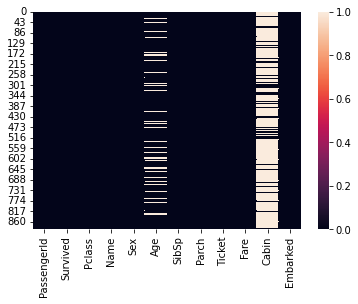

In [13]:
# Heatmap for Null values in Train dataset
sns.heatmap(train_data.isnull())

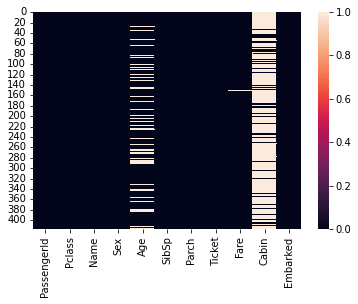

In [14]:
# Heatmap for Null values in Test dataset
sns.heatmap(test_data.isnull())


**Handling the Missing values**

In [15]:
# Drop the "Cabin" column from the train and test dataframe as most of the values is null
train_data = train_data.drop('Cabin',axis=1)
test_data = test_data.drop('Cabin',axis=1)

In [16]:
# Replacing the missing values in "Age" column with mean value in Train and test dataset
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)

In [17]:
# Finding the mode value of "Embarked" column in Train dataset
print(train_data['Embarked'].mode())

0    S
dtype: object


In [18]:
# Finding the mode value of "Embarked" column in Test dataset
print(test_data['Embarked'].mode())

0    S
dtype: object


In [19]:
# Replacing the missing values in "Embarked" column with mode value in Train and test dataset
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)

In [20]:
#  Replacing the missing values in "Fare" column with mean value in test dataset
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)

In [21]:
# Check the number of missing values in each column in Train Dataset
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [22]:
# Check the number of missing values in each column in Test Dataset
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**Data Analysis**

In [23]:
# Getting some statistical measures about the data
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## <font color='Red'>**Akash Kumar**</font>



**Data Visualization**

In [24]:
# Finding the number of people survived and not survived
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

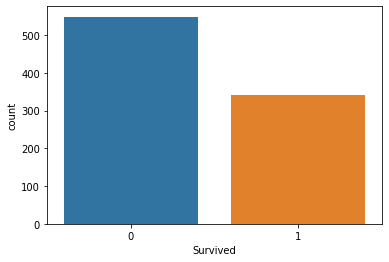

In [25]:
# Making a count plot for "Survived" column
sns.countplot(x = 'Survived', data=train_data)

In [26]:
# Get a count of gender
train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

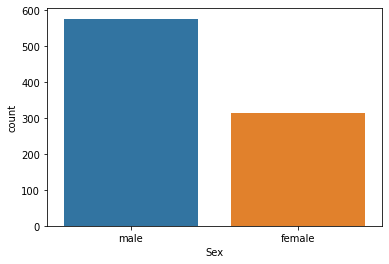

In [27]:
# Making a count plot for "Sex" column
sns.countplot(x = 'Sex', data=train_data)

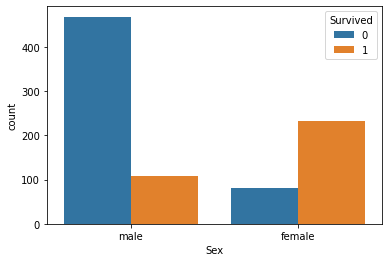

In [28]:
# Number of survivors Gender wise
sns.countplot(x = 'Sex', hue='Survived', data=train_data)

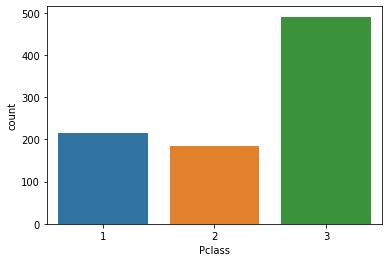

In [29]:
# Making a count plot for "Pclass" column   (Ticket class)
sns.countplot(x = 'Pclass', data=train_data)

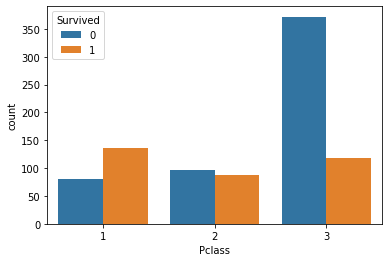

In [30]:
# Number of survivors Ticket class wise
sns.countplot(x = 'Pclass', hue='Survived', data=train_data)

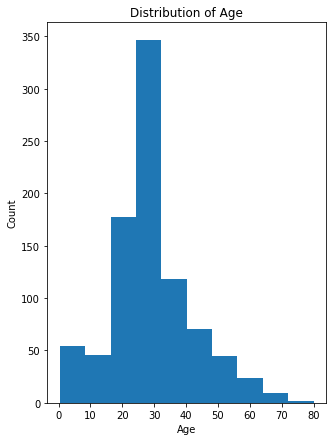

In [31]:
# Histogram
# Frequency of passengers group by Age
plt.figure(figsize=(5,7))
plt.hist(train_data['Age'])
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

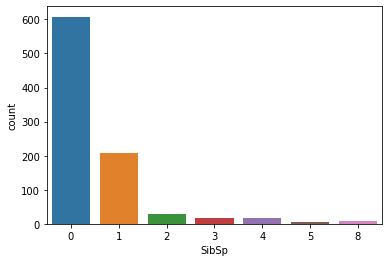

In [32]:
# Number of siblings/spouses aboard the Titanic
sns.countplot(x = 'SibSp', data=train_data)

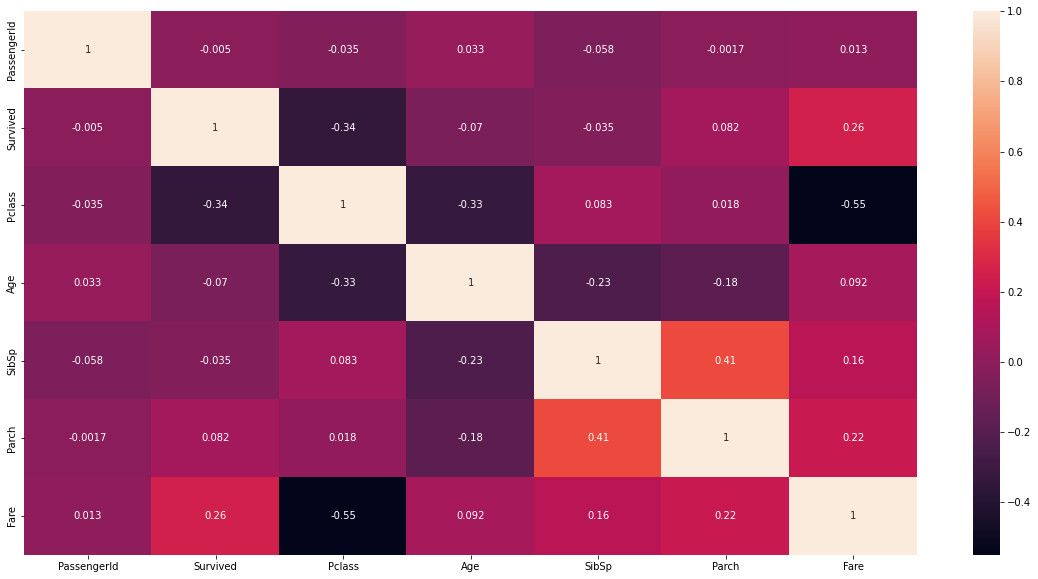

In [33]:
# Heatmap 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(train_data.corr(),annot = True)
plt.show()

## <font color='Red'>**Mounika**</font>



**Encoding the Categorical Columns**

In [34]:
# In Sex column--> male & female gender need to be encoded  
train_data['Sex'].value_counts()   

male      577
female    314
Name: Sex, dtype: int64

In [35]:
# In Embarked column--> S (Southampton), C (Cherbourg), Q (Queenstown) port need to encoded
train_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [36]:
# Converting categorical Columns

train_data.replace({'Sex':{'male':0,'female':1}}, inplace=True)

test_data.replace({'Sex':{'male':0,'female':1}}, inplace=True)

train_data = pd.get_dummies(train_data, columns=['Embarked'], prefix=['Embarked_'], drop_first=True)

test_data = pd.get_dummies(test_data, columns=['Embarked'], prefix=['Embarked_'], drop_first=True)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked__Q,Embarked__S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,1


## <font color='Red'>**Abhishek Kumar**</font>



**Separating features & Target**

In [37]:
X_train = train_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y_train = train_data['Survived']

X_test = test_data.drop(columns = ['PassengerId','Name','Ticket'],axis=1)

X_train.shape, X_test.shape, Y_train.shape

((891, 8), (418, 8), (891,))

**Model Building**

Logistic Regression

In [38]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [39]:
lr_model = LogisticRegression(max_iter = 170)
lr_model.fit(X_train, Y_train)   ## Training the Logistic Regression model with training data

LogisticRegression(max_iter=170)

In [40]:
# accuracy on training data
X_train_prediction = lr_model.predict(X_train) 

In [41]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)    # compare the original data values (Y_train) with predicted data values 
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8002244668911336


In [42]:
# accuracy on test data
X_test_prediction = lr_model.predict(X_test)

In [43]:
X_test_df = pd.DataFrame(X_test_prediction, columns=['Survived'])
X_test_df.head()

X_test_df_id = pd.DataFrame(test_data[['PassengerId']])

X_test_df = pd.concat([X_test_df_id, X_test_df],axis=1)
X_test_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [44]:
# Calculating the Survived percentage in the test set
print('Surival rate in the test data set: {}%'.format(round(X_test_df.Survived.sum()/len(X_test_df) *100,2)))

Surival rate in the test data set: 35.89%


In [45]:
Geneder_DATA_PATH = "/content/drive/MyDrive/Project/gender_submission.csv"
Y_test_df = pd.read_csv(Geneder_DATA_PATH)
Y_test_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [46]:
Y_test = Y_test_df['Survived']

In [47]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)  
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.937799043062201


In [48]:
# Calculating the roc_auc_score in the test set
roc_auc_score(Y_test, X_test_prediction)

0.9313909774436091

In [49]:
# Calculating the f1_score in the test set
f1_score(Y_test, X_test_prediction, average='weighted')

0.9377095608213994

## <font color='Red'>**Vinay Reddy**</font>



### **Decision Tree**

In [50]:
dt_model = DecisionTreeClassifier(max_depth=6, random_state=42)    
dt_model.fit(X_train,Y_train)

test_pred = dt_model.predict(X_test)
train_pred = dt_model.predict(X_train)
print(f"Train Accuracy: {accuracy_score(Y_train, train_pred)*100:.2f}%")
print(f"Test Accuracy: {accuracy_score(Y_test, test_pred)*100:.2f}%")

Train Accuracy: 86.53%
Test Accuracy: 88.52%


In [51]:
# classification report
cr = metrics.classification_report(Y_test, test_pred) 
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       266
           1       0.87      0.80      0.84       152

    accuracy                           0.89       418
   macro avg       0.88      0.87      0.87       418
weighted avg       0.88      0.89      0.88       418



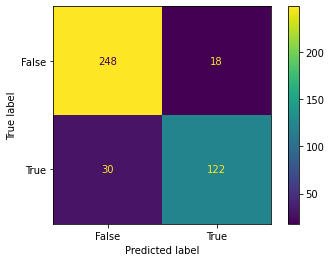

In [52]:
# Confusion Matrix

confusion_matrix = metrics.confusion_matrix(Y_test, test_pred)  # y_test --actual value, test_pred --- predicted value
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])    
cm_display.plot()
plt.show()
plt.close()

## <font color='Red'>**Priyadharshan R**</font>



K-Nearest Neighbour

In [53]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, Y_train)
train_pred = knn_model.predict(X_train)
test_pred = knn_model.predict(X_test)

print(accuracy_score(Y_train, train_pred))
print(accuracy_score(Y_test, test_pred))

0.8585858585858586
0.84688995215311


In [54]:
print(f"Train Accuracy: {accuracy_score(Y_train, train_pred)*100:.2f}%")   # other way 
print(f"Test Accuracy: {accuracy_score(Y_test, test_pred)*100:.2f}%")

Train Accuracy: 85.86%
Test Accuracy: 84.69%


Random Forest

In [55]:
rf_model= RandomForestClassifier(max_depth=8, n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)
train_pred = rf_model.predict(X_train)
test_pred = rf_model.predict(X_test)

print(f"Train Accuracy: {accuracy_score(Y_train, train_pred)*100:.2f}%")
print(f"Test Accuracy: {accuracy_score(Y_test, test_pred)*100:.2f}%")

Train Accuracy: 90.57%
Test Accuracy: 89.00%


In [56]:
# classification report
cr = metrics.classification_report(Y_test, test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       266
           1       0.88      0.81      0.84       152

    accuracy                           0.89       418
   macro avg       0.89      0.87      0.88       418
weighted avg       0.89      0.89      0.89       418



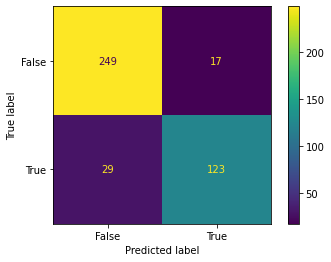

In [57]:
# Confusion Matrix
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(Y_test, test_pred)  # y_test --actual value, test_pred --- predicted value
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
plt.close()

## <font color='Red'>**Abhishek Yadav**</font>



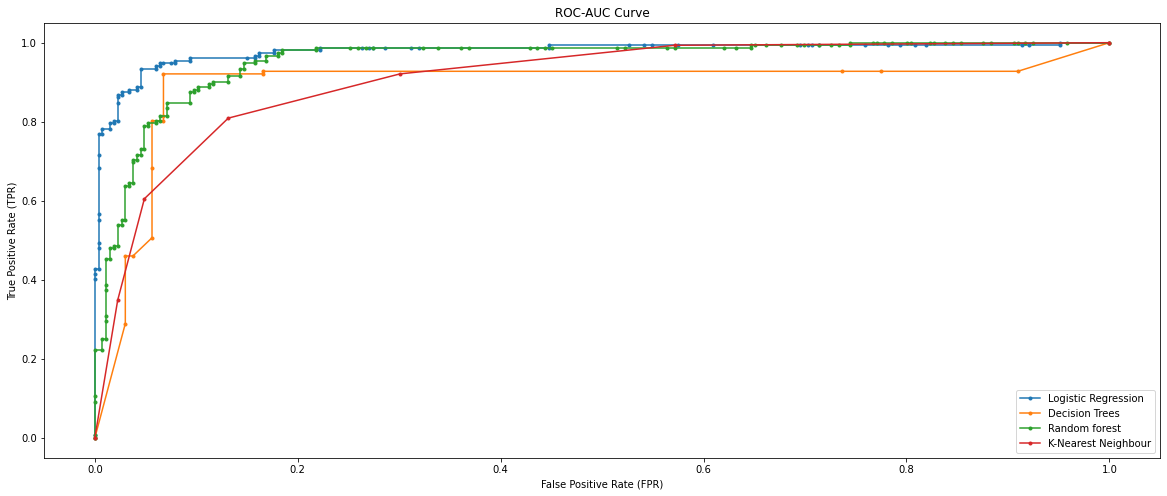

In [58]:
lr_probs = lr_model.predict_proba(X_test)
lr_probs = lr_probs[:, 1]


dt_probs = dt_model.predict_proba(X_test)
dt_probs = dt_probs[:, 1]


rf_probs = rf_model.predict_proba(X_test)
rf_probs = rf_probs[:, 1]

knn_probs = knn_model.predict_proba(X_test)
knn_probs = knn_probs[:, 1]

lr_fpr, lr_tpr, lr_thresh = roc_curve(Y_test, lr_probs)
dt_fpr, dt_tpr, dt_thresh = roc_curve(Y_test, dt_probs)
rf_fpr, rf_tpr, rf_thresh = roc_curve(Y_test, rf_probs)
knn_fpr, knn_tpr, knn_thresh = roc_curve(Y_test, knn_probs)


plt.figure(figsize=(20, 8))
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression')
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Trees')
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random forest')
plt.plot(knn_fpr, knn_tpr, marker='.', label='K-Nearest Neighbour')

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC-AUC Curve")

plt.legend(loc='lower right')
plt.show()
plt.close()


## <font color='Red'>**END**</font>

